# CCF with iSpec # 

Sergio Turrado Prieto, 17/09/2025

# The software #

iSpec is an open source spectral analysis tool developed by Sergi Blanco Cuaresma. It can easily be installed from [this link](https://www.blancocuaresma.com/s/iSpec).
Beware that, for this demonstration, the radiative transfer codes will NOT BE NEEDED.

all that you'll need to do is go [here](https://www.blancocuaresma.com/s/iSpec/manual/installation/linux/anacondapython), make sure you tick all the boxes with the dependencies and then simply download the [source code](https://www.blancocuaresma.com/s/iSpec/manual/installation/downloads), decompress and move it to a directory of your choice. The final instructions "make clean", "make spectrum", "make turbospectrum", and "make moog" **don't need to be run**. 


# Load iSpec #

If you get them, ignore the NumPy version warnings by now (hopefully this is safe!). The warnings happen because the 2023 iSpec release is optimized for python 3.11.8. Fix this in your own virtual environment.

In [1]:
import os
import sys
import logging

import numpy as np
import matplotlib.pyplot as plt


################################################################################
#--- iSpec directory (CHANGE TO YOUR OWN PATH) ---------------------------------
ispec_dir = '/home/sturrado/iSpec_v20230804/'

sys.path.insert(0, os.path.abspath(ispec_dir))
import ispec


#--- Change LOG level ----------------------------------------------------------
#LOG_LEVEL = "warning"
LOG_LEVEL = "info"
logger = logging.getLogger() # root logger, common for all
logger.setLevel(logging.getLevelName(LOG_LEVEL.upper()))
################################################################################

# Load spectra #

Visualize your loaded spectrum. The method *ispec.read_spectrum()* allows for both *.fits* files and *.txt* files, and even compressed *.txt.gz* files.

iSpec comes with a few stellar spectra in the folder */input/spectra/*, but feel free to try to open any of your own!

The method *ispec.plot_spectra()* is convenient to plot spectra loaded with *ispec.read_spectrum()* and allows for simultaneous plotting. However, it doesn't allow to zoom in. Beware that the argument of this method is **one tuple of spectra**.

**MINOR OVERSIGHT IN THE iSpec CODE**: in order to get *ispec.plot_spectra()* to work, you will need to modify iSpec's self function to import the *plot_spectra()* method. Just add ***from .plotting import plot_spectra*** at the end of ***ispec/\__init\__.py***.

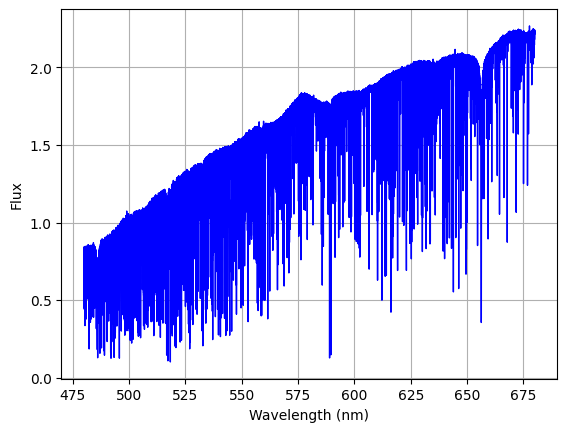

In [2]:
spectrum_path1 = ispec_dir + 'input/spectra/examples/NARVAL_Sun_Vesta-1_no_RV_correction.txt.gz'
# Place your own spectra here
#spectrum_path2  = '/home/sturrado/CAB/PROYECTO_TESIS/HARPS/Spectra_reduced/harpsALL_spec/BD-100047_rv.fits'
#spectrum_path3 = '/home/sturrado/CAB/PROYECTO_TESIS/HARPS/Spectra_reduced/harpsALL_spec/BD-130718_rv.fits'


spectrum1 = ispec.read_spectrum(spectrum_path1)
#spectrum2 = ispec.read_spectrum(spectrum_path2)
#spectrum3 = ispec.read_spectrum(spectrum_path3)


ispec.plot_spectra([spectrum1])
#ispec.plot_spectra([spectrum2, spectrum3])

The spectra that iSpec reads from *.txt* or compressed *.txt.gz* files need to have three columns named:

    waveobs	flux	err
    480.0002	0.67077	0.0021259
    480.0032	0.73986	0.0022541
    480.0063	0.78621	0.0023222

The above is an example.

This structure coincides with the objects iSpec loads with its *ispec.read_spectrum()* method, which are dictionaries with keys of the same name.
So, to control your own plots:

(0.0, 1.5)

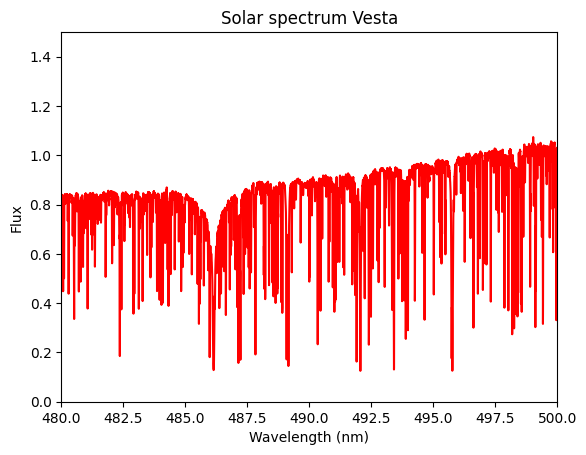

In [3]:
plt.plot(spectrum1['waveobs'], spectrum1['flux'], color='r')
plt.title('Solar spectrum Vesta')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.xlim(480, 500)
plt.ylim(0.0, 1.5)

# Calculate and plot the CCF relative to a line mask #

iSpec can compute the cross-correlation function of your raw spectrum relative to a list of lines of your choice. There are several line masks available inside ispec in */input/linelists/*. A README.txt file documenting these line masks can be found in *'input/linelists/CCF/README.txt'*. These line mask files have a lot of columns and support spectral typer from A0 to M5 in the optical.


**However**, in order to perform a CCF calculation, all iSpec really needs is a line mask file containing two columns: **'wave_peak'**, with the position of the lines, and **'depth'**, containing the *theoretical* strength of the line as a fraction of the continuum flux, which is, of course, dependant on spectral type and parameters. This means iSpec can read *this* as a line mask:


    wave_peak	depth
    500.1234	0.24759908731
    501.5678	0.335208788309
    502.8910	0.665403020413


The *ispec.cross_correlate_with_mask()* function will then return two objects:

- Array with however many fitted gaussian models (mean *.mu* + error *.emu*) sorted by depth (deepest at position 0). Errors are
  calculated following [this](https://ui.adsabs.harvard.edu/abs/2003MNRAS.342.1291Z/abstract) method.
  
- CCF structure with 'x' (velocities), 'y' (relative intensities), 'err' (propagated ccf error).

The lower and upper velocity limits, velocity step can be determined, and a minimum line depth for cross-correlation can be set. If fourier==True, the CCF is performed in the Fourier space. More info:

**VELOCITIES FROM CROSS-CORRELATION: A GUIDE FOR SELF-IMPROVEMENT, CARLOS ALLENDE PRIETO**
        http://iopscience.iop.org/1538-3881/134/5/1843/fulltext/205881.text.html
        http://iopscience.iop.org/1538-3881/134/5/1843/fulltext/sourcecode.tar.gz

[2025-09-17 11:19:39,767] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 0.00%
[2025-09-17 11:19:39,776] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 10.22%
[2025-09-17 11:19:39,785] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 20.45%
[2025-09-17 11:19:39,794] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 30.67%
[2025-09-17 11:19:39,803] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 40.90%
[2025-09-17 11:19:39,819] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 60.10%
[2025-09-17 11:19:39,829] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 70.32%
[2025-09-17 11:19:39,839] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 80.55%
[2025-09-17 11:19:39,848] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 90.77%
[2025-09-17 11:19:40,018] [INFO] [lines:__model_velocity_profile:2455]: Pe

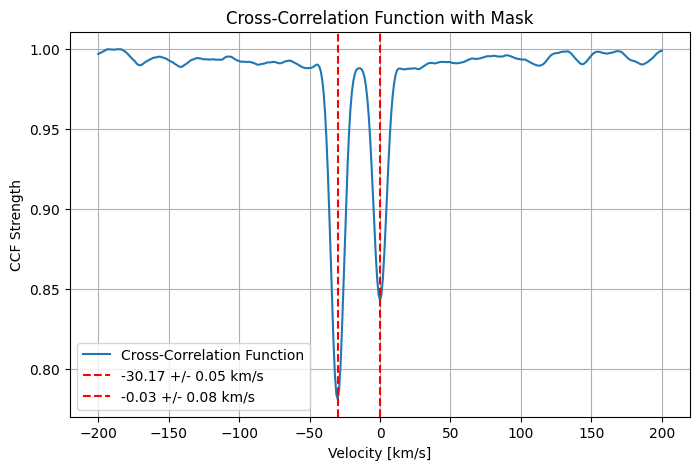

(array([-3.017e+01, -3.000e-02]), array([0.05, 0.08]))

In [4]:
# Load a new spectrum
spectrum_path = ispec_dir + 'input/spectra/binaries/elodie_hd005516A_spectroscopic_binary.s.gz' # Path to your spectrum
spectrum = ispec.read_spectrum(spectrum_path) # Load te spectrum as an object manageable by iSpec

# Load a new line mask
rv_mask_file = ispec_dir + "input/linelists/CCF/Narval.Sun.370_1048nm/mask.lst" # Path to your line mask
#rv_mask_file = "/home/sturrado/iSpec_v20230804/input/linelists/CCF/mask_TEST0.lst" # Path to your line mask
ccf_mask = ispec.read_cross_correlation_mask(rv_mask_file) # Load the line mask

only_one_peak = False # If only_one_peak==True, only the highest peak of the CCF will be returned

def perform_ccf(spectrum, ccf_mask, only_one_peak = only_one_peak):
    # The method ispec.cross_correlate_with_mask can be found in 'ispec/lines.py', line 2212
    models, ccf = ispec.cross_correlate_with_mask(spectrum, ccf_mask, \
                            lower_velocity_limit=-200, upper_velocity_limit=200, \
                            velocity_step=1.0, mask_depth=0.01, \
                            fourier=False,  only_one_peak = only_one_peak) # If only_one_peak==True, only the highest peak of the CCF will be returned
    
    # The number of models is the number of significant CCF peaks
    n_components = len(models)
    peak_pos     = np.zeros(n_components)
    err          = np.zeros(n_components)
    
    for i in range (n_components):
        peak_pos[i] = np.round(models[i].mu(), 2) # CCF peak positions, in km/s
        err[i]      = np.round(models[i].emu(), 2) # CCf peak position errors, in km/s. Follows Zucker (2003) (https://ui.adsabs.harvard.edu/abs/2003MNRAS.342.1291Z/abstract)
    
    # Plot the raw CCF
    plt.figure(figsize=(8,5))
    plt.plot(ccf['x'], ccf['y'], label="Cross-Correlation Function")
    for i in range (n_components):
        plt.axvline(peak_pos[i], color='r', linestyle='--', label=f"{peak_pos[i]:.2f} +/- {err[i]:.2f} km/s")
    plt.xlabel("Velocity [km/s]")
    plt.ylabel("CCF Strength")
    plt.legend()
    plt.grid()
    plt.title("Cross-Correlation Function with Mask")
    plt.show()
    return peak_pos, err

perform_ccf(spectrum, ccf_mask)

# Easily correct for radial velocity #

The *ispec.correct_velocity()* method takes a spectrum and a radial velocity and returns the RV corrected spectrum.

[2025-09-17 11:19:40,644] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 0.00%
[2025-09-17 11:19:40,650] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 10.22%
[2025-09-17 11:19:40,656] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 20.45%
[2025-09-17 11:19:40,662] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 30.67%
[2025-09-17 11:19:40,667] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 40.90%
[2025-09-17 11:19:40,678] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 60.10%
[2025-09-17 11:19:40,683] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 70.32%
[2025-09-17 11:19:40,689] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 80.55%
[2025-09-17 11:19:40,696] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 90.77%
[2025-09-17 11:19:40,715] [INFO] [lines:__model_velocity_profile:2455]: Pe

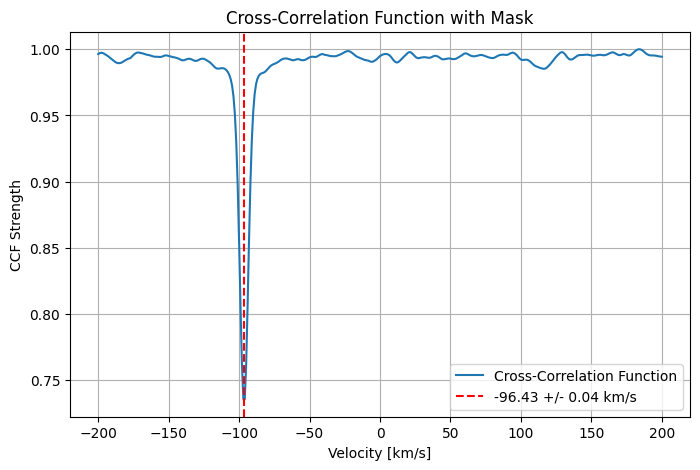

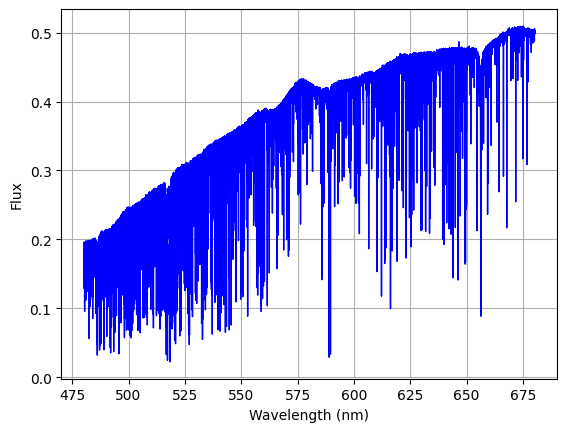

[False False False ... False False False]


(655.0, 657.0)

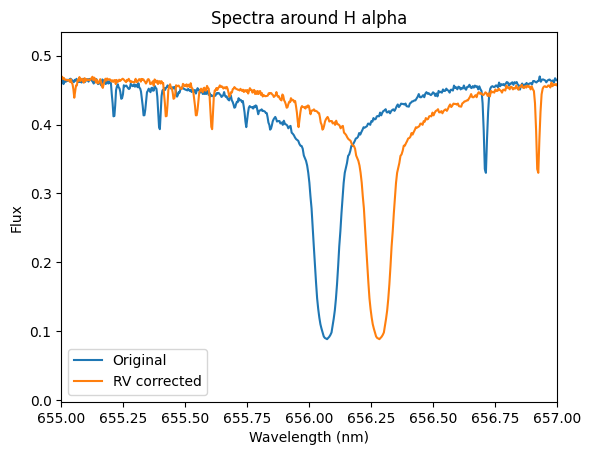

In [5]:
# Load a new spectrum
spectrum_path = ispec_dir + 'input/spectra/examples/NARVAL_muCas.txt.gz' # Path to your spectrum
spectrum = ispec.read_spectrum(spectrum_path) # Load te spectrum as an object manageable by iSpec

# Load a new line mask
rv_mask_file = ispec_dir + "input/linelists/CCF/Narval.Sun.370_1048nm/mask.lst" # Path to your line mask
ccf_mask = ispec.read_cross_correlation_mask(rv_mask_file) # Load the line mask

rv, rv_err = perform_ccf(spectrum, ccf_mask)

spectrum_rvcorr = ispec.correct_velocity(spectrum, rv[0]) # Use only the RV value with the highest CCF peak.
ispec.plot_spectra([spectrum_rvcorr])
print(spectrum==spectrum_rvcorr)


plt.plot(spectrum['waveobs'], spectrum['flux'], label='Original')
plt.plot(spectrum_rvcorr['waveobs'], spectrum_rvcorr['flux'], label='RV corrected')
plt.legend()
plt.title('Spectra around H alpha')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.xlim(655, 657)

# Check for BV correction with a telluric linemask # 

To check if a certain raw spectrum has been corrected for barycentric velocity (i.e. the velocity of the Earth around the Sun), one can calulate the CCF relative to a line mask of telluric lines.
Getting one sole strong peak at zero means that the spectrum has not been corrected for BV. Barycentric velocity then has to be determined using the observation date.

To do this, iSpec also comes equipped with one telluric line mask, in *input/linelists/CCF/Synth.Tellurics.500_1100nm/mask.lst*. As in the case of the other line masks, it contains a lot of columns, but only **three** are necessary, in case you want to use your own telluric line mask. Apart from the previously mentioned **'wave_peak'** and **'depth'** columns, you will need an extra **'discarded'** column, that has to be filled with 'True' or 'False' string flags. If you fill a line with 'True', iSpec will not take that line into account for CCF calculation and subsequent removal of this region from the spectrum. Be **very careful** with the formatting in this table, as iSpec reads it through 

telluric_lines = ascii.read(telluric_lines_file, delimiter="\t", encoding='utf-8').as_array()

A valid line mask format is:

    wave_peak	depth	discarded
    500.1234	0.24759908731	False
    501.5678	0.335208788309	False
    502.8910	0.665403020413	False

Not catering to this format will lead to an error like this: **InconsistentTableError: 
ERROR: Unable to guess table format with the guesses listed below:**

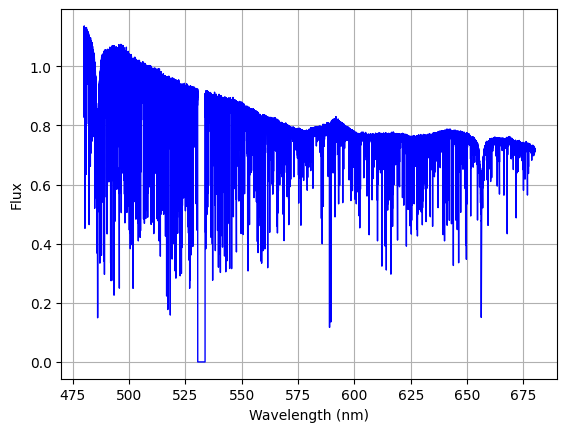

[2025-09-17 11:19:42,083] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 0.00%
[2025-09-17 11:19:42,090] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 10.22%
[2025-09-17 11:19:42,096] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 20.45%
[2025-09-17 11:19:42,102] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 30.67%
[2025-09-17 11:19:42,108] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 40.90%
[2025-09-17 11:19:42,119] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 60.10%
[2025-09-17 11:19:42,125] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 70.32%
[2025-09-17 11:19:42,131] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 80.55%
[2025-09-17 11:19:42,137] [INFO] [lines:__cross_correlation_function_uniform_in_velocity:1994]: 90.77%
[2025-09-17 11:19:42,149] [INFO] [lines:__model_velocity_profile:2455]: Pe

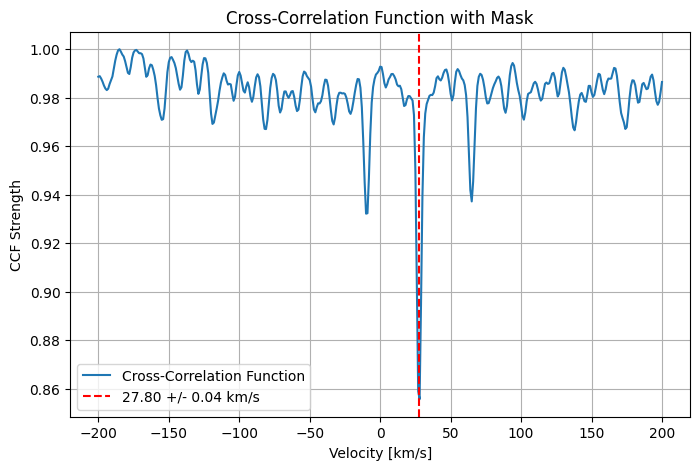

BV : [27.8] +/- [0.04] km/s


In [6]:
spectrum_path = ispec_dir + 'input/spectra/examples/HARPS.GBOG_Procyon.txt.gz'
spectrum = ispec.read_spectrum(spectrum_path)

ispec.plot_spectra([spectrum])

telluric_linelist_file = ispec_dir + "input/linelists/CCF/Synth.Tellurics.500_1100nm/mask.lst"
#telluric_linelist_file = "/home/sturrado/iSpec_v20230804/input/linelists/CCF/mask_TEST1.lst" # Path to your line mask
telluric_linelist = ispec.read_telluric_linelist(telluric_linelist_file, minimum_depth=0.0) # lines with depths below the minimum_depth argument will not be taken into account

# If the highest peak of the CCF is not in zero, then it is the barycentric velocity
bv, bv_err = perform_ccf(spectrum, telluric_linelist, only_one_peak=True)

print(f"BV : {bv} +/- {bv_err} km/s")

# Remove regions of your spectrum affected by telluric lines # 

If telluric contamination is heavy, iSpec also has a buil-in method to filter regions around these lines from the spectrum. The ***ispec.create_filter_for_regions_affected_by_tellurics()*** method returns a mask that is True around a user-defined wavelength interval around each line (given in Doppler shift, km/s, as the arguments *min_velocity* and *max_velocity*), so that then they can be filtered out. Continuing with the same spectrum:

[2025-09-17 11:19:42,256] [INFO] [lines:create_filter_for_regions_affected_by_tellurics:2032]: 0.00%
[2025-09-17 11:19:42,257] [INFO] [lines:create_filter_for_regions_affected_by_tellurics:2032]: 10.06%
[2025-09-17 11:19:42,258] [INFO] [lines:create_filter_for_regions_affected_by_tellurics:2032]: 20.12%
[2025-09-17 11:19:42,259] [INFO] [lines:create_filter_for_regions_affected_by_tellurics:2032]: 30.18%
[2025-09-17 11:19:42,259] [INFO] [lines:create_filter_for_regions_affected_by_tellurics:2032]: 40.24%
[2025-09-17 11:19:42,260] [INFO] [lines:create_filter_for_regions_affected_by_tellurics:2032]: 50.30%
[2025-09-17 11:19:42,261] [INFO] [lines:create_filter_for_regions_affected_by_tellurics:2032]: 60.36%
[2025-09-17 11:19:42,262] [INFO] [lines:create_filter_for_regions_affected_by_tellurics:2032]: 70.42%
[2025-09-17 11:19:42,262] [INFO] [lines:create_filter_for_regions_affected_by_tellurics:2032]: 80.48%
[2025-09-17 11:19:42,263] [INFO] [lines:create_filter_for_regions_affected_by_tellu

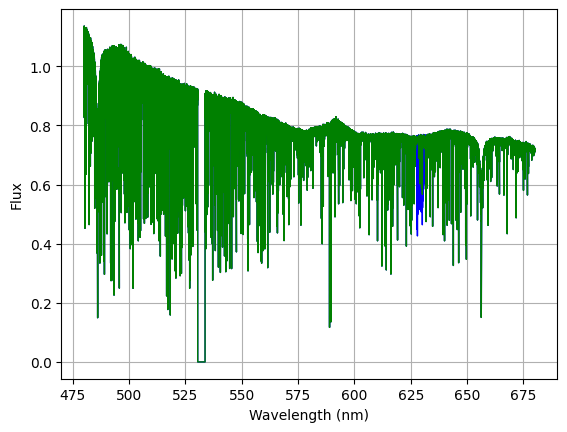

In [7]:
# Only clean sectrum for lineas above the 75th depth prcentile
dfilter = telluric_linelist['depth'] > np.percentile(telluric_linelist['depth'], 75)

tfilter = ispec.create_filter_for_regions_affected_by_tellurics(spectrum['waveobs'], \
                            telluric_linelist[dfilter], min_velocity=-30.0, \
                            max_velocity=+30.0)

clean_spectrum = spectrum[~tfilter]

ispec.plot_spectra([spectrum, clean_spectrum])